 ## Set up

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

import config
from config import LEVELS
from interactomes import read_or_create_interactome
from visualization import plot_low_level_pathways
import lib.percolation
import matplotlib.pyplot as plt

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


In [2]:
graphs = { l: read_or_create_interactome(l, True, config.GRAPHS_PATH) for l in LEVELS}
# graphs_no_sm = [read_or_create_full_graph(level, False, graphs_path, v=False) for level in LEVELS]

In [3]:
print("Number of edges: ")
e = pd.Series([graphs[l].size() for l in LEVELS], index=LEVELS)
v_entities = pd.Series([graphs[l].graph['num_' + l] for l in LEVELS], index=LEVELS)
v_small_molecules = pd.Series([graphs[l].graph['num_small_molecules'] for l in LEVELS], index=LEVELS)

sizes = pd.DataFrame({"Interactions": e, "Accessioned Entities": v_entities, "Simple Entities": v_small_molecules}, index=LEVELS)
sizes.columns.name = "Entity Type"
sizes

Number of edges: 


Entity Type,Interactions,Accessioned Entities,Simple Entities
genes,456321,10804,1963
proteins,465632,10902,1963
proteoforms,678627,14039,1963


In [13]:
degrees = {l: [graphs[l].degree(n) for n in graphs[l].nodes()] for l in LEVELS}
mins = pd.Series([min(degrees[l]) for l in LEVELS], index=LEVELS)
maxs = pd.Series([max(degrees[l]) for l in LEVELS], index=LEVELS)
avgs = pd.Series([sum(degrees[l])/len(degrees[l]) for l in LEVELS], index=LEVELS)

degrees_mma = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=LEVELS)
degrees_mma.columns.name = "Entity Type"
degrees_mma

Entity Type,Min,Max,Avg
genes,0,1226,71.48
proteins,0,1227,72.39
proteoforms,0,1451,84.82


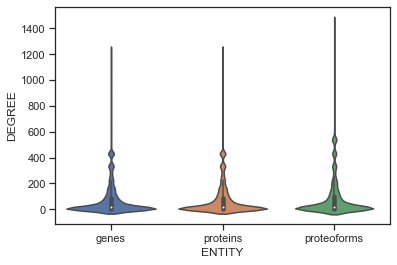

In [5]:
datas = { l: {'ENTITY': np.repeat(l, len(degrees[l])), 'DEGREE': degrees[l]} for l in LEVELS}
degrees_dfs = [pd.DataFrame(datas[l], columns=['ENTITY', 'DEGREE']) for l in LEVELS]

degrees_df = pd.concat(degrees_dfs)
sns.set(style="ticks")
ax = sns.violinplot(x="ENTITY", y="DEGREE", data=degrees_df)

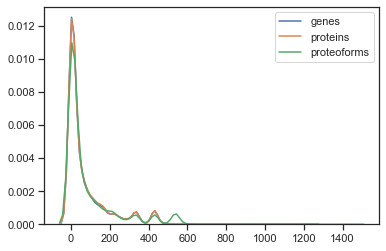

In [6]:
import matplotlib.pyplot as plt

[sns.kdeplot(degrees[l], label=l) for l in LEVELS]
plt.legend();

In [7]:
degrees = {l: [graphs[l].degree(n) for n, t in graphs[l].nodes(data='type') if t != "SimpleEntity"] for l in LEVELS}
mins = pd.Series([min(degrees[l]) for l in LEVELS], index=LEVELS)
maxs = pd.Series([max(degrees[l]) for l in LEVELS], index=LEVELS)
avgs = pd.Series([sum(degrees[l])/len(degrees[l]) for l in LEVELS], index=LEVELS)

degrees_df = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=LEVELS)
degrees_df.columns.name = "Entity Type"
degrees_df

Entity Type,Min,Max,Avg
genes,0,1226,81.970381
proteins,0,1227,82.941662
proteoforms,0,1451,94.751763


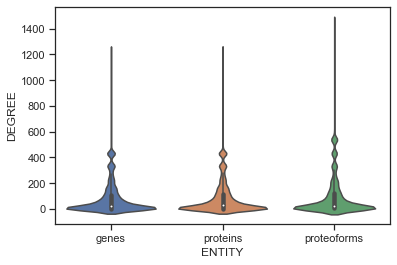

In [8]:
datas = { l: {'ENTITY': np.repeat(l, len(degrees[l])), 'DEGREE': degrees[l]} for l in LEVELS}
degrees_dfs = [pd.DataFrame(datas[l], columns=['ENTITY', 'DEGREE']) for l in LEVELS]

degrees_df = pd.concat(degrees_dfs)
sns.set(style="ticks")
ax = sns.violinplot(x="ENTITY", y="DEGREE", data=degrees_df)

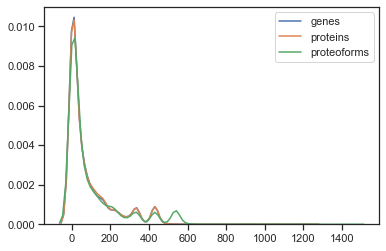

In [9]:
import matplotlib.pyplot as plt

[sns.kdeplot(degrees[l], label=l) for l in LEVELS]
plt.legend();

## Bridges and Articulation points

In [10]:
br_ap = pd.DataFrame({
    "Articulation Points": [len(list(nx.articulation_points(graphs[l]))) for l in LEVELS],
    "Bridges": [len(list(nx.bridges(graphs[l]))) for l in LEVELS]},
    index=LEVELS)
br_ap.columns.name = "Entity Type"

br_ap

Entity Type,Articulation Points,Bridges
genes,319,587
proteins,320,589
proteoforms,395,649


In [11]:
#plot_low_level_pathways(figures_path="figures/pathways/", graphs_path="reports/pathways/")

In [12]:
# TODO: Write function that plots and highlights the articulation points of an interaction network.
# TODO: Write function that plots and highlights also the bridges of the network.